# Linear Regressions


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, mean_squared_log_error, mean_absolute_error, 
    r2_score, explained_variance_score, median_absolute_error
)

from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [3]:
# change default figsize
plt.rcParams["figure.figsize"] = (10, 4)

## Simple Linear Regression

+ $Y = a \times x + b$
+ $h_{\theta}(X) = \theta_0 + \theta_1 \cdot x$, where $\theta$ is the dependent parameters of our model.

### Sample Data

- Linear vs. Non-linear Data
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

In [15]:
n_samples = 500

(500, 1) (500,) 64.59172413316013


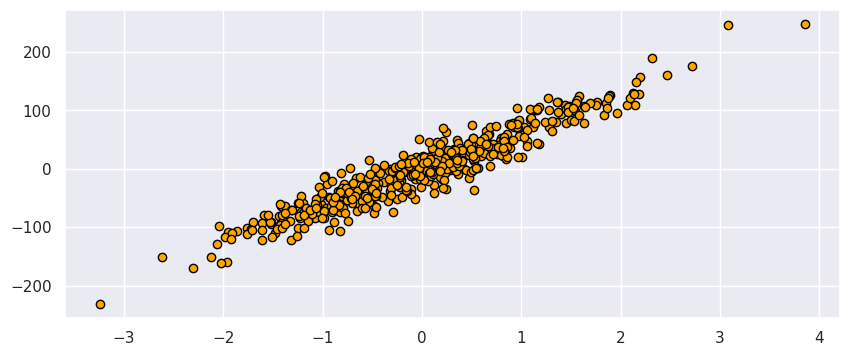

In [16]:
X1, y1, coef1 = make_regression(
    n_samples=n_samples, n_features=1, n_informative=1, noise=20, coef=True, random_state=42
)
print(X1.shape, y1.shape, coef1)

plt.plot(
    X1, y1, color='yellowgreen', linewidth=0, marker='o',  
    fillstyle='full', markerfacecolor='orange',  markeredgecolor='black'
)
plt.show()

(500, 1) (500,)


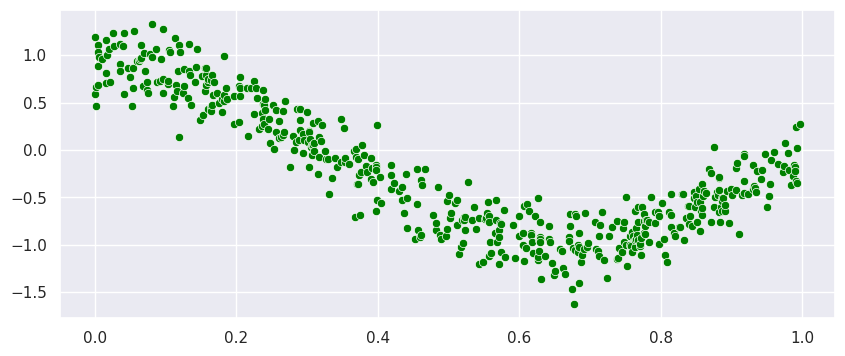

In [6]:
# transform X by cosine and pi
def true_function(X):
     return np.cos(1.5 * np.pi * X)
    
# sort the random values from small to large
X2 = np.sort(np.random.rand(n_samples))
# add some random noises to results of true function
y2 = true_function(X2) + np.random.randn(n_samples) * 0.2
# add a new axis to X data
X2 = X2[:, np.newaxis]
print(X2.shape, y2.shape)

sns.scatterplot(x=X2[:, 0], y=y2, color='green')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.2,random_state=714)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 1), (100, 1), (400,), (100,))

In [9]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2,random_state=722)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(400, 1) (100, 1) (400,) (100,)


### LinearRegression

In [39]:
lr_sk = LinearRegression()
lr_sk.fit(X_train, y_train)

print('lr_sk intercept:', lr_sk.intercept_)
print('lr_sk coefficient:', lr_sk.coef_[0])

lr_sk intercept: -1.0964725274664726
lr_sk coefficient: 62.8395905421103


In [40]:
tmp = r2_score(y_true=y_test, y_pred=lr_sk.predict(X_test))

print('Base Score: ', tmp)

Base Score:  0.9223577310231275


In [41]:
# MSE
mean_squared_error(y_true=y_test, y_pred=lr_sk.predict(X_test))

381.0171892388134

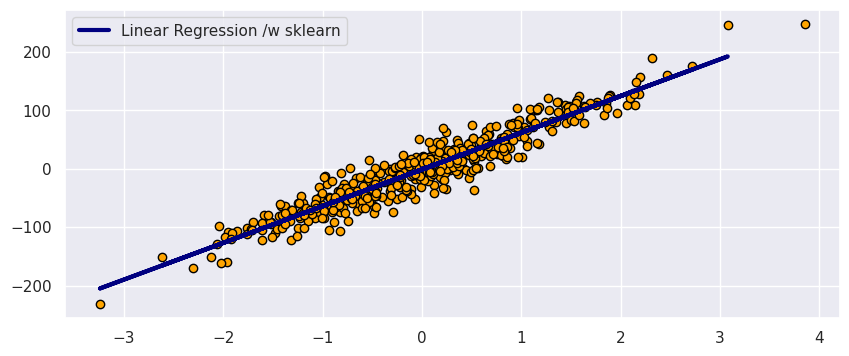

In [42]:
# plot original data agaist fitted model
plt.plot(X1, y1, color='yellowgreen', linewidth=0, marker='o', 
         fillstyle='full', markerfacecolor='orange',  markeredgecolor='black')
plt.plot(X_test, lr_sk.predict(X_test), color='navy', linewidth=3,
         label='Linear Regression /w sklearn')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [35]:
lr_sk_nl = LinearRegression()
lr_sk_nl.fit(X2_train, y2_train)

print('lr_sk intercept:', lr_sk_nl.intercept_)
print('lr_sk coefficient:', lr_sk_nl.coef_[0])

lr_sk intercept: 0.6760036504561415
lr_sk coefficient: -1.7870041830375083


In [36]:
tmp = r2_score(y_true=y2_test, y_pred=lr_sk_nl.predict(X2_test))

print('Base Score: ', tmp)

Base Score:  0.5688019656215391


In [37]:
mean_squared_error(y_true=y2_test, y_pred=lr_sk_nl.predict(X2_test))

0.19888585995942593

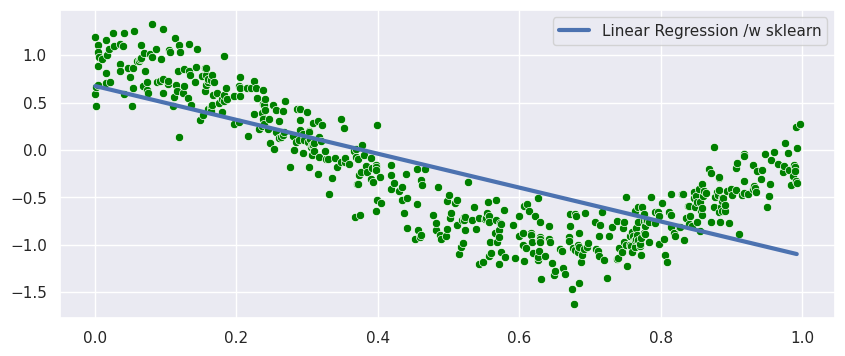

In [38]:
sns.scatterplot(x=X2[:, 0], y=y2, color='green')
sns.lineplot(x=X2_test[:, 0], y=lr_sk_nl.predict(X2_test), linewidth=3, \
            label='Linear Regression /w sklearn')
plt.legend(loc='best')
plt.show()

### numpy.linalg

In [25]:
n_feature = X_train.shape[1]

# added column of ones, i.e. the bias term in regression formula
# X_ones = np.concatenate([X_train, np.ones((len(X_train), 1))], axis=1)
X_ones = np.c_[X_train, np.ones((len(X_train), 1))]
print(X_ones.shape)
X_ones[:10, :]

(400, 2)


array([[-0.2209696 ,  1.        ],
       [-1.19787789,  1.        ],
       [ 0.66213067,  1.        ],
       [-0.75913266,  1.        ],
       [ 0.30729952,  1.        ],
       [ 0.03526355,  1.        ],
       [ 0.65655361,  1.        ],
       [-0.90938745,  1.        ],
       [-0.69972551,  1.        ],
       [ 0.24368721,  1.        ]])

In [26]:
b1_np, a_np = np.linalg.lstsq(X_ones, y_train, rcond=None)[0]

print('numpy linalg intercept:', b1_np)
print('numpy linalg coefficient:', a_np)

numpy linalg intercept: 62.83959054211027
numpy linalg coefficient: -1.0964725274664706


In [27]:
tmp = r2_score(y_true=y_test, y_pred=np.add(np.dot(b1_np, X_test), a_np))
print('numpy linalg score:', tmp)

numpy linalg score: 0.9223577310231273


### gradient descent

- https://www.cs.toronto.edu/~frossard/post/linear_regression/
- one **epoch** = one forward pass and one backward pass of all the training examples
- **batch size** = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
- number of **iterations** = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.


In [28]:
#adding ones to X data
X_train_ones = np.c_[X_train, np.ones((len(X_train), 1))]
X_test_ones = np.c_[X_test, np.ones((len(X_test), 1))]

In [29]:
theta = np.random.randn(2) # randomly initialized weight/theta
alpha = 0.5 # learning rate
n_iterations = 50 


#### At each iteration:  
1. compute the error/cost, i.e. the difference between current theta * X and the label y
2. using gradient descent, formula: $\theta_0 - \alpha \times \frac{1}{m} \sum{errors \times X^i}$
3. update thetas

In [43]:
# training by iterations
for iteration in range(n_iterations):
    # get current error/cost
    error = y_train.flatten() - (X_train_ones.dot(theta).flatten())
    # get current gradient 
    gradient = -(1.0/len(X_train_ones)) * np.dot(error, X_train_ones)
    # get new theta by learning rate and gradient
    new_theta = theta - alpha * gradient
    
    # display training MSE 
    if iteration % 10 == 0:
        mse = (1.0/len(X_train_ones)) * np.sum(np.power((y_train.flatten() - X_train_ones.dot(theta).flatten()), 2))
        print("Iteration: %d - Train Error: %.4f" %(iteration, mse))
    # update theta 
    theta = new_theta
    
print('Training Finished after {} iterations'.format(n_iterations))
test_mse = (1.0/len(X_test_ones)) * np.sum(np.power((y_test.flatten() - X_test_ones.dot(theta).flatten()), 2))

print("Coefficient/Weight =",theta)
print("Test Error/Cost =", test_mse)

Iteration: 0 - Train Error: 398.7125
Iteration: 10 - Train Error: 398.7125
Iteration: 20 - Train Error: 398.7125
Iteration: 30 - Train Error: 398.7125
Iteration: 40 - Train Error: 398.7125
Training Finished after 50 iterations
Coefficient/Weight = [62.83959054 -1.09647253]
Test Error/Cost = 381.01718923881344


In [44]:
# get prediction on test set
y_test_pred = np.matmul(X_test_ones, theta)

In [45]:
temp = r2_score(y_true=y_test, y_pred=y_test_pred)
print('numpy linalg score:', temp)

numpy linalg score: 0.9223577310231273


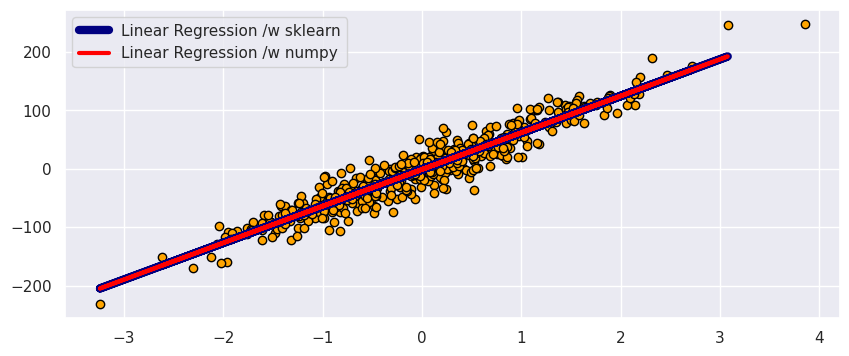

In [46]:

# the data points
plt.plot(X1, y1, color='yellowgreen', linewidth=0, marker='o', 
         fillstyle='full', markerfacecolor='orange',  markeredgecolor='black')
# sklearn result
plt.plot(X_test, lr_sk.predict(X_test), color='navy', linewidth=6, label='Linear Regression /w sklearn')
# gradient descent result
plt.plot(X_test, y_test_pred, color='red', linewidth=3, label='Linear Regression /w numpy')

plt.legend(loc='best')
plt.grid(True)
plt.show()
# almost the same as done in sklearn

## Multiple Linear Regression

+ $Y = a_1 \times x_1 + a_2 \times x_2 + ... + a_i \times x_i + b$
+ $h_{\theta}(X) = \theta_0 + \theta_1 \cdot x_1 + ... + \theta_i \cdot x_i$, where $\theta$ is the dependent parameters of our model.

The extension to multiple and/or vector-valued predictor variables (denoted with a capital X) is known as multiple linear regression, also known as multivariable linear regression.

In [47]:
from sklearn.preprocessing import PolynomialFeatures

### Sample Data

In [10]:
n_samples = 500

In [48]:
# transform X by cosine and pi
def true_function(X):
     return np.cos(2.0 * np.pi * X)
    
# sort the random values from small to large
data_X_nl = np.sort(np.random.rand(n_samples))
# add some random noises to results of true function
data_y_nl = true_function(data_X_nl) + np.random.randn(n_samples) * 0.5
# add a new axis to X data
data_X_nl = data_X_nl[:, np.newaxis]
# data_X_nl.max(), data_X_nl.min()
data_X_nl.shape, data_y_nl.shape

((500, 1), (500,))

In [49]:
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(
    data_X_nl, data_y_nl, test_size=0.2)
print(X_train_nl.shape, X_test_nl.shape, y_train_nl.shape, y_test_nl.shape)

(400, 1) (100, 1) (400,) (100,)


In [50]:
def plot_true_func():
#     plt.figure(figsize=(12, 6))
    sns.scatterplot(x=X_train_nl[:, 0], y=y_train_nl, alpha=0.5)
    sns.lineplot(x=X_test_nl[:, 0], y=true_function(X_test_nl)[:, 0], linewidth=2, \
                label='True Function', alpha=0.7)

In [51]:
lr_1 = LinearRegression()
lr_1.fit(X_train_nl, y_train_nl)

def plot_simple():
    sns.lineplot(x=X_test_nl[:, 0], y=lr_1.predict(X_test_nl), \
             linewidth=2, label='Simple Linear Model', alpha=0.8)

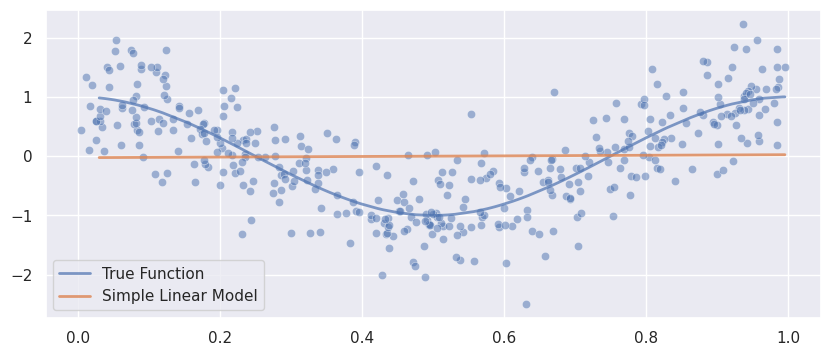

In [52]:
plot_true_func(); plot_simple()
plt.show()
# under fitting

In [53]:
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_nl_3 = poly_3.fit_transform(X_train_nl)
X_test_nl_3 = poly_3.transform(X_test_nl)

lr_3 = LinearRegression()
_ = lr_3.fit(X_train_nl_3, y_train_nl) # suppress output

def plot_degree3(): 
    sns.lineplot(x=X_test_nl[:, 0], y=lr_3.predict(X_test_nl_3), \
             linewidth=2, label='Poly Model /w degree=3', alpha=0.8)

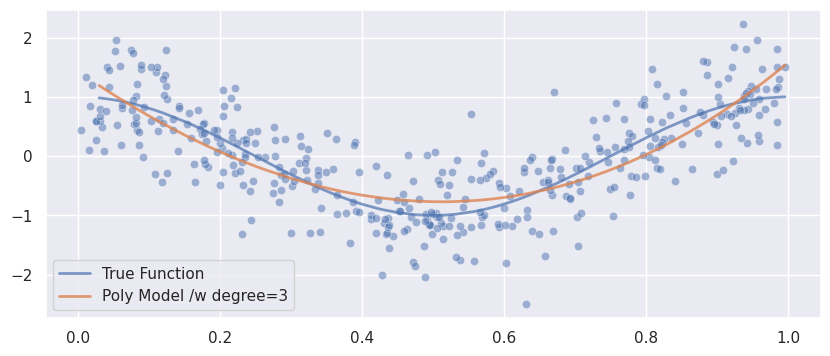

In [54]:
plot_true_func(); plot_degree3()
plt.show()

In [55]:
poly_30 = PolynomialFeatures(degree=30, include_bias=False)
X_train_nl_30 = poly_30.fit_transform(X_train_nl)
X_test_nl_30 = poly_30.transform(X_test_nl)

lr_30 = LinearRegression()
_ = lr_30.fit(X_train_nl_30, y_train_nl)

def plot_degree30():
    sns.lineplot(x=X_test_nl[:, 0], y=lr_30.predict(X_test_nl_30), \
             linewidth=2, label='Poly Model /w degree=30', alpha=0.8)

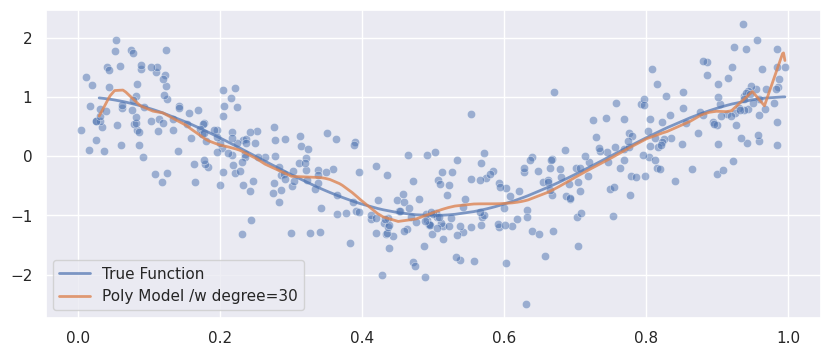

In [57]:
plot_true_func(); plot_degree30()
plt.show()
# over fitting

### Lasso & Ridge

In [58]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#### With Lasso regularization
Lasso: Least Absolute Shrinkage and Selection Operator  
Linear Model trained with L1 prior as regularizer (aka the Lasso)

In [59]:
alphas = [1.0, .5, .05, .01, .005, .001]

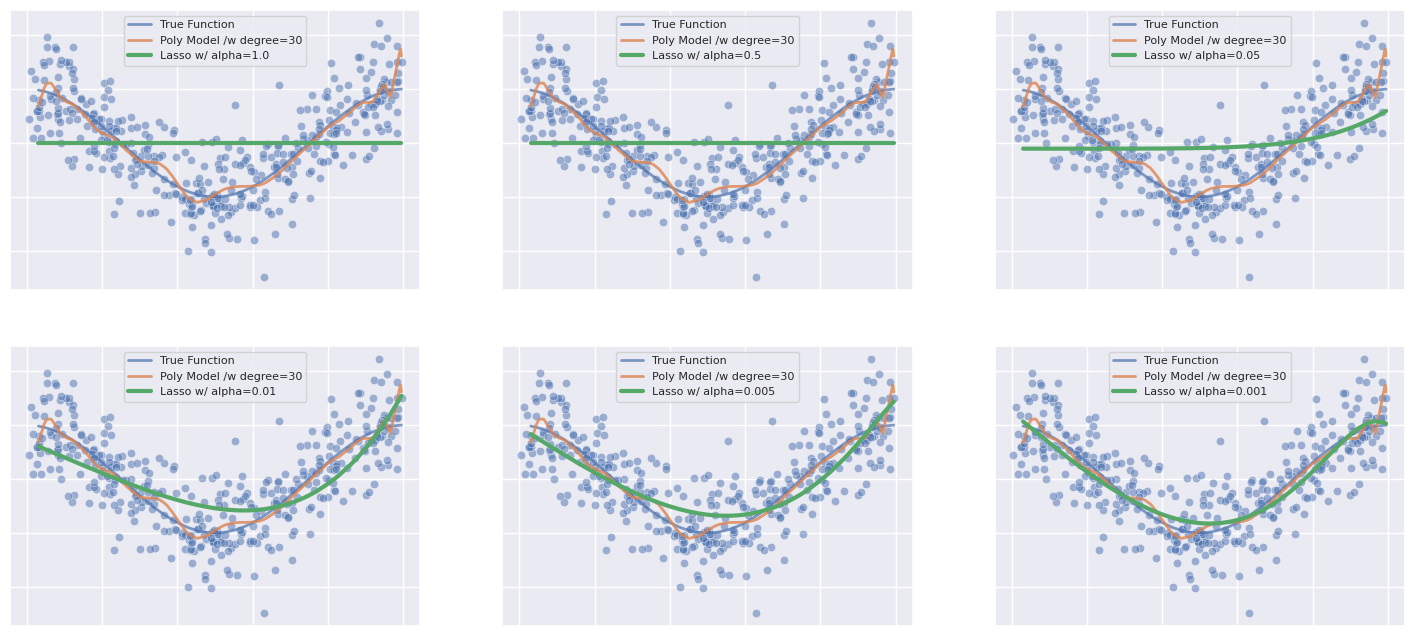

In [60]:
# another way to control subplots
fig = plt.figure(figsize=(18, 8))

for idx, alp in enumerate(alphas): 
    ax = fig.add_subplot(2, len(alphas)//2, idx+1)
    # build the lasso model
    lasso = Lasso(alpha=alp, max_iter=10000); _ = lasso.fit(X_train_nl_30, y_train_nl)
    # set both ticks to be disabled
    plt.tick_params(axis='both', labelbottom=False, labelleft=False)
    # plot the data and models
    plot_true_func(); plot_degree30()
    sns.lineplot(x=X_test_nl[:, 0], y=lasso.predict(X_test_nl_30), \
         linewidth=3, label='Lasso w/ alpha=' + str(alp))
    plt.legend(loc='best', prop={'size': 8})
plt.show()

#### With Ridge regulariation
This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm.  
Also known as Ridge Regression or Tikhonov regularization. 

In [61]:
alphas = [5.0, 2.0, 1.5, 1.0, .5, .01]

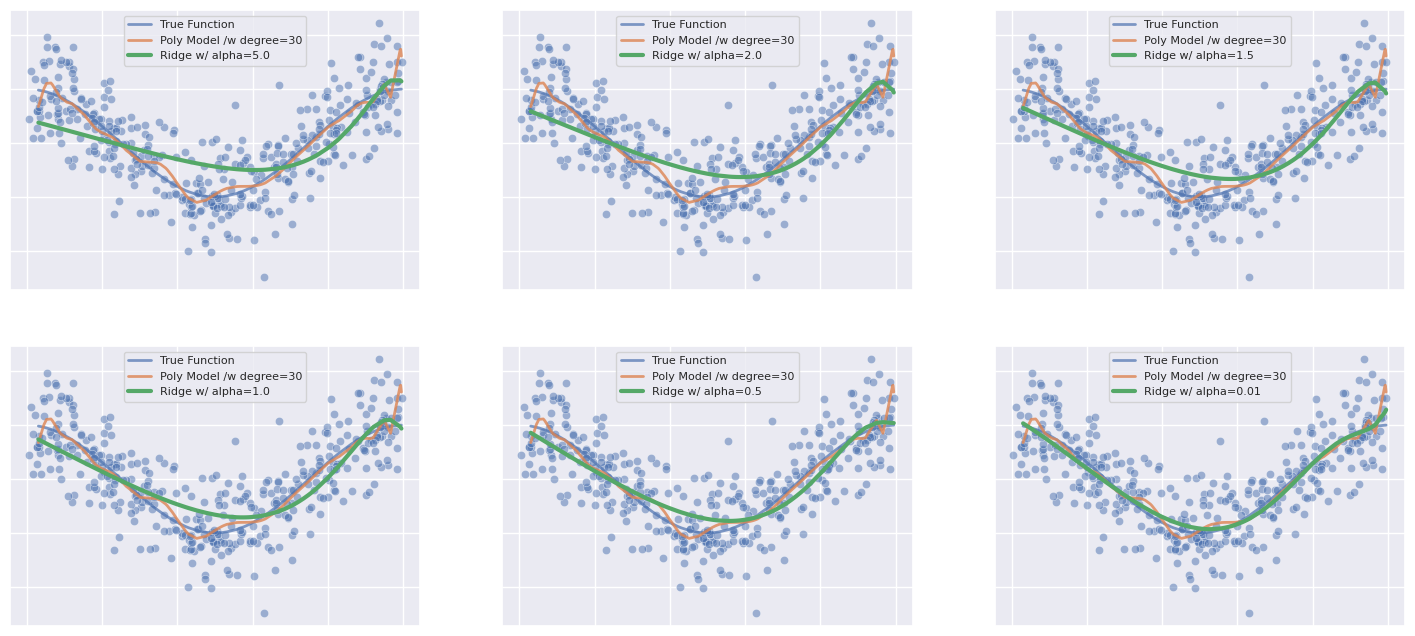

In [62]:
fig = plt.figure(figsize=(18, 8))

for idx, alp in enumerate(alphas): 
    ax = fig.add_subplot(2, len(alphas)//2, idx+1)
    # build the lasso model
    ridge = Ridge(alpha=alp, max_iter=10000); _ = ridge.fit(X_train_nl_30, y_train_nl)
    # set both ticks to be disabled
    plt.tick_params(axis='both', labelbottom=False, labelleft=False)
    # plot the data and models
    plot_true_func(); plot_degree30()
    sns.lineplot(x=X_test_nl[:, 0], y=ridge.predict(X_test_nl_30), \
         linewidth=3, label='Ridge w/ alpha=' + str(alp))
    plt.legend(loc='best', prop={'size': 8})
plt.show()

### gradient descent

- https://www.cs.toronto.edu/~frossard/post/linear_regression/  
- https://anujkatiyal.com/blog/2017/09/30/ml-regression/#.XCkJnM0-1PY  
- https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c  
- https://codingstartups.com/practical-machine-learning-ridge-regression-vs-lasso/  

In [54]:
X_train_nl_30.shape, y_train_nl.shape, X_test_nl_30.shape, y_test_nl.shape

((160, 30), (160,), (40, 30), (40,))

In [55]:
#adding ones to X data
X_train_ones = np.c_[X_train_nl_30, np.ones((len(X_train_nl_30), 1))]
X_test_ones = np.c_[X_test_nl_30, np.ones((len(X_test_nl_30), 1))]
X_train_ones.shape, X_test_ones.shape

((160, 31), (40, 31))

In [56]:
theta = np.random.randn(X_train_ones.shape[1]) # randomly initialized weight/theta/beta
alpha = 0.5 # learning rate
n_iterations = 5000 # number of iterations

In [57]:
# training by iterations
for iteration in range(n_iterations):
    # get current error, or called cost 
    error = y_train_nl.flatten() - (X_train_ones.dot(theta).flatten())
    # get current gradient 
    gradient = -(1.0/len(X_train_ones)) * np.dot(error, X_train_ones)
    # get new theta by learning rate and gradient
    new_theta = theta - alpha * gradient
    
    # display training MSE 
    if iteration % 1000 == 0: # message control, change this if higher iterations
        mse = (1.0/len(X_train_ones)) * \
            np.sum(np.power((y_train_nl.flatten() - X_train_ones.dot(theta).flatten()), 2))
        print("Iteration: %d - Train Error: %.4f" %(iteration, mse))
    # update theta 
    theta = new_theta
    
print('Training Finished after {} iterations'.format(n_iterations))
test_mse = (1.0/len(X_test_ones)) * \
    np.sum(np.power((y_test_nl.flatten() - X_test_ones.dot(theta).flatten()), 2))

# print("Coefficient/Weight =",theta)
print("Test Error/Cost =", test_mse)

Iteration: 0 - Train Error: 0.7727
Iteration: 1000 - Train Error: 0.2217
Iteration: 2000 - Train Error: 0.2142
Iteration: 3000 - Train Error: 0.2126
Iteration: 4000 - Train Error: 0.2121
Training Finished after 5000 iterations
Test Error/Cost = 0.1605984602561572


In [58]:
# get prediction on test set
y_test_pred = np.matmul(X_test_ones, theta)

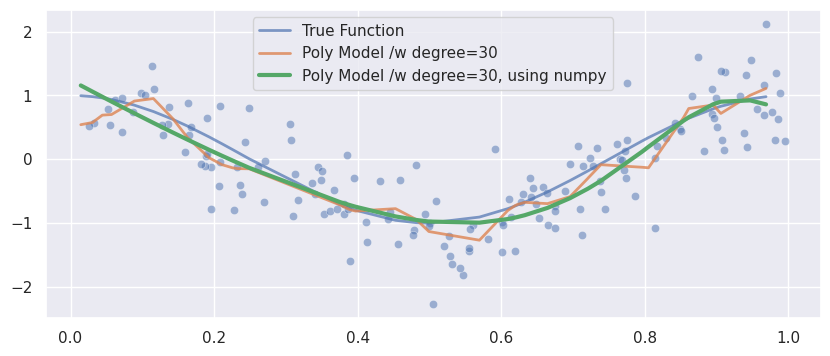

In [59]:
plot_true_func(); plot_degree30()
sns.lineplot(x=X_test_nl[:, 0], y=y_test_pred, \
             linewidth=3, label='Poly Model /w degree=30, using numpy')
plt.show()

#### L1 Regularization, Lasso regression
Cost/Loss function is:  
$ \displaystyle\sum_{i=1}^{n}(y_i - \sum_{j=1}^{p} x_{ij}\beta_j)^2 + \lambda \times \sum_{j=1}^{p} |\beta_j|$  
Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function, i.e. $\lambda \times \sum_{j=1}^{p} |\beta_j|$  
+ if $\lambda$ is very large 
    + then it will add too much weight and it will lead to under-fitting.
+ if $\lambda$ is zero
    + then it's just OLS, ordinary least square
+ with $\lambda \times \sum_{j=1}^{p} |\beta_j|$
    + Lasso shrinks the less important feature's coefficients to zero, thus almost removing features (?)
    + Lasso will work better with feature selections, if have larger number of features
    + Lasso punishes high values of the coefficients $\beta$ and even setting them to zero if they are not relevant
    + Therefore, the regularized model may have fewer features included than you started with
    + e.g. with $\beta = -0.00219$, $|-0.00219| = 0.00219 \approx 0$

In [60]:
theta = np.random.randn(X_train_ones.shape[1]) # randomly initialized weight/theta/beta
alpha = 0.5 # learning rate
n_iterations = 5000 # number of iterations
param_lambda = .05
# larger value = Train Error to inf
# smaller value, correct?

In [61]:
# training by iterations
for iteration in range(n_iterations):
    # get current error, or called cost 
    error = y_train_nl.flatten() - (X_train_ones.dot(theta).flatten())
    # get current gradient 
    # add L1 regularization term 
    gradient = -(1.0/len(X_train_ones)) * np.dot(error, X_train_ones) \
            + param_lambda * abs(theta) 
    # get new theta by learning rate and gradient
    new_theta = theta - alpha * gradient
    
    # display training MSE 
    if iteration % 1000 == 0: # message control, change this if higher iterations
        mse = (1.0/len(X_train_ones)) * \
            np.sum(np.power((y_train_nl.flatten() - X_train_ones.dot(theta).flatten()), 2))
        print("Iteration: %d - Train Error: %.4f" %(iteration, mse))
    # update theta 
    theta = new_theta
    
print('Training Finished after {} iterations'.format(n_iterations))
test_mse = (1.0/len(X_test_ones)) * \
    np.sum(np.power((y_test_nl.flatten() - X_test_ones.dot(theta).flatten()), 2))

# print("Coefficient/Weight =",theta)
print("Test Error/Cost =", test_mse)

Iteration: 0 - Train Error: 7.7629
Iteration: 1000 - Train Error: 2505427387168993.0000
Iteration: 2000 - Train Error: 37777831395660375369752467849871360.0000
Iteration: 3000 - Train Error: 1310874192415129963881521631324406402606583377511317504.0000
Iteration: 4000 - Train Error: 45486759955665837957547676601520153272854083649269274310490622712489181184.0000
Training Finished after 5000 iterations
Test Error/Cost = 1.3176709656691166e+93


In [62]:
# get prediction on test set
y_test_pred = np.matmul(X_test_ones, theta)

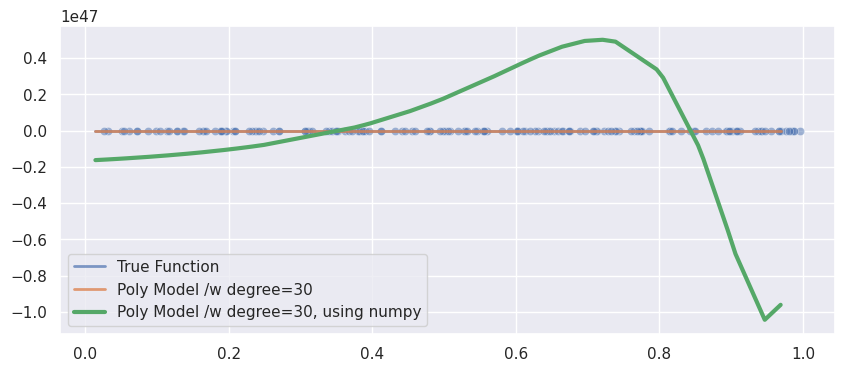

In [63]:
plot_true_func(); plot_degree30()
sns.lineplot(x=X_test_nl[:, 0], y=y_test_pred, \
             linewidth=3, label='Poly Model /w degree=30, using numpy')
plt.show()

#### L2 Regularizatoin, Ridge regression
Cost/Loss function is:  
$ \displaystyle\sum_{i=1}^{n}(y_i - \sum_{j=1}^{p} x_{ij}\beta_j)^2 + \lambda \times \displaystyle\sum_{j=1}^{p} \beta_j^2$  
Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function, i.e. $\lambda \times \sum_{j=1}^{p} \beta_j^2$
+  if $\lambda$ is very large 
    + then it will add too much weight and it will lead to under-fitting.
+ if $\lambda$ is zero
    + then it's just OLS, ordinary least square
+ with $\lambda \times \sum_{j=1}^{p} \beta_j^2$
    + it enforces the $\beta$ coefficients to be lower, but it does not enforce them to be zero
    + it will not get rid of irrelevant features but rather minimize their impact on the trained model

In [64]:
theta = np.random.randn(X_train_ones.shape[1]) # randomly initialized weight/theta/beta
alpha = 0.5 # learning rate
n_iterations = 5000 # number of iterations
param_lambda = 1.0
# larger value = Train Error to inf
# smaller value, correct?

In [65]:
# training by iterations
for iteration in range(n_iterations):
    # get current error, or called cost 
    error = y_train_nl.flatten() - (X_train_ones.dot(theta).flatten())
    # get current gradient 
    # add L1 regularization term 
    gradient = -(1.0/len(X_train_ones)) * np.dot(error, X_train_ones) \
            + param_lambda * theta**2
    # get new theta by learning rate and gradient
    new_theta = theta - alpha * gradient
    
    # display training MSE 
    if iteration % 1000 == 0: # message control, change this if higher iterations
        mse = (1.0/len(X_train_ones)) * \
            np.sum(np.power((y_train_nl.flatten() - X_train_ones.dot(theta).flatten()), 2))
        print("Iteration: %d - Train Error: %.4f" %(iteration, mse))
    # update theta 
    theta = new_theta
    
print('Training Finished after {} iterations'.format(n_iterations))
test_mse = (1.0/len(X_test_ones)) * \
    np.sum(np.power((y_test_nl.flatten() - X_test_ones.dot(theta).flatten()), 2))

# print("Coefficient/Weight =",theta)
print("Test Error/Cost =", test_mse)

Iteration: 0 - Train Error: 2.2013
Iteration: 1000 - Train Error: nan
Iteration: 2000 - Train Error: nan
Iteration: 3000 - Train Error: nan
Iteration: 4000 - Train Error: nan
Training Finished after 5000 iterations
Test Error/Cost = nan


/tmp/ipykernel_621/3079488516.py:8: RuntimeWarning: overflow encountered in square
  + param_lambda * theta**2
/tmp/ipykernel_621/3079488516.py:7: RuntimeWarning: invalid value encountered in add
  gradient = -(1.0/len(X_train_ones)) * np.dot(error, X_train_ones) \


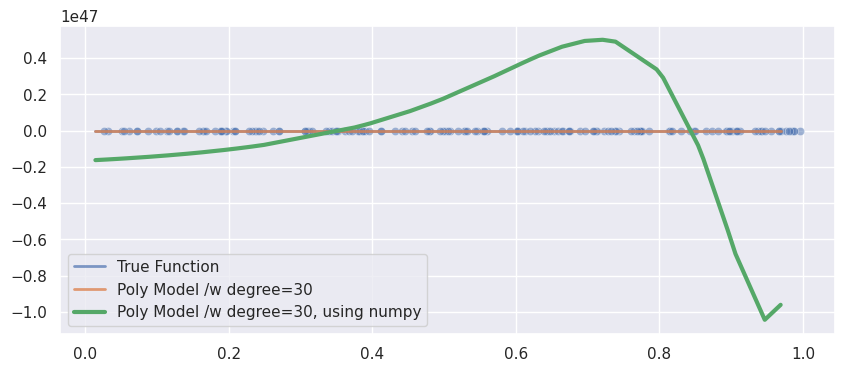

In [66]:
plot_true_func(); plot_degree30()
sns.lineplot(x=X_test_nl[:, 0], y=y_test_pred, \
             linewidth=3, label='Poly Model /w degree=30, using numpy')
plt.show()